<a href="https://colab.research.google.com/github/agustin-ammazzagatti/ICARO-trabajo-practico-nro-3/blob/main/Sprint_3_NLP___Data_Science_ICARO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas Sprint 3 - Procesamiento de Lenguaje Natural (NLP)

### Objetivos:
1. Comprender los fundamentos del Procesamiento de Lenguaje Natural
2. Estructurar un caso de generación de valor a partir de los datos, en un escenario sin hipótesis previa o demanda específica de negocio.
3. Aplicar algoritmos elementales para la explotación de datos conversacionales no estructurados.
4. Evaluar y comparar modelos. Evaluar y comparar iniciativas entre distintos practicantes de Data Science.
5. Interpretar y comunicar los resultados


### Descripción
Yelp es una aplicación que permite reseñar negocios locales. En este trabajo analizaras un dataset de reviews (opiniones de usuarios).

El equipo a cargo del Diseño del Producto (Yelp), pone a disposición del área de Data Science una serie de reviews generadas a lo largo de meses. ¿Qué puedes decir acerca del negocio?

### Consignas
Deberás utilizar técnicas de Procesamiento de Lenguaje Natural para aportar valor a la unidad de negocio.

Como mínimo debes incluir:
1. keywords y tópicos por negocio (business id)  
2. sentimiento de cada review  
3. entidades por review  
4. negocio con más comentarios positivos y negocio con más comentarios negativos.  

Además, podés agregar opcionalmente: tópicos asociados a sentimientos, keywords asociadas a sentimientos, sentimientos a lo largo del tiempo, o lo que desees explorar. El análisis no tiene limites.

### Datos
- [yelp_reviews.csv](https://drive.google.com/file/d/1aIOpsZYqFM0I22hFuQxS2avN82PDaWuc/view?usp=sharing)  

Recordá: intentá familiarizarte con las columnas. Además, investigá si Yelp ofrece repositorios públicos (vía descarga o vía API) con más features o más actuales (a fines exploratorios, no es obligatorio que amplíes los datos)


### Entrega de notebook

**Fecha limite**: A definir junto al docente.

### Presentación

En esta entrega, imaginá que estás presentando los resultados del área de Data Science. Estarán presentes tanto los Líderes Técnicos como miembros del equipo de Diseño de Producto.
En este caso, la presentación **NO debe ser una presentación de notebook**.
Debe hacerse sobre un soporte de presentación con diapositivas
1. Los **resultados y hallazgos** obtenidos
2. Las herramientas que utilizadas
3. Decisiones de negocio, o sugerencias recomendadas en base a los hallazgos encontrados (sin necesidad de profundizar en observaciones que deban hacer otras areas de la empresa).
4. Conclusiones.


# Análisis exploratorio de los datos (EDA)

In [ ]:
# montar google drive en colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# carga CSV en un dataframe
file_path = '/content/drive/MyDrive/Colab Notebooks/Diplomatura ICARO/Sprint 2 - TP 1 (NLP)/yelp_reviews.csv'

df = pd.read_csv(file_path)

## Comprensión inicial de los datos

### 📝 Diccionario de datos

| Columna         | Descripción                                                                 |
|-----------------|------------------------------------------------------------------------------|
| user_id         | ID único del usuario que escribió la reseña.                                |
| review_id       | ID único de la reseña.                                                      |
| text            | Texto libre con la opinión del usuario sobre el negocio.                    |
| votes.cool      | Número de votos "cool" que recibió la reseña por parte de otros usuarios.   |
| votes.funny     | Número de votos "funny" que recibió la reseña por parte de otros usuarios.  |
| votes.useful    | Número de votos "useful" que recibió la reseña por parte de otros usuarios. |
| business_id     | ID del negocio al que hace referencia la reseña.                            |
| stars           | Calificación otorgada por el usuario (de 1 a 5 estrellas).                  |
| date            | Fecha en que se realizó la reseña.                                          |
| type            | Tipo de entrada (en este dataset siempre es "review").                      |


### Primeras observaciones generales

In [ ]:
# mostrar 5 filas aleatorias del dataframe
df.sample(5)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
26430,S3bzNa2KUQ69Q7Lazq6PBw,whLyzku2FHArJWGK0wdw0w,From the time my parents moved to Charlotte in...,3,F5DJEqbNveNq8x94XU_Vqw,0,5,2011-07-09,review,5
24591,K5dxGhJ99TmS6La6krwkcg,rVqi_BbCU08sJBAtGnEEng,This is a great place to see live music in Cha...,1,J7XRfg3ScS5K7UyM5Te-ng,0,4,2006-12-03,review,2
4135,9cCTmiJ7hz35rHIdr8n9kA,LshZ3BEZRI0dw8r_4qEXgA,Nice neighborhood coffee. Small but always se...,0,uie9L4ZrCvDdkSdByOVTLQ,0,3,2011-01-24,review,0
13325,qPGLUQUG43b3aBZKDUBlMw,wnwGI77ywCNpWEJsXyFDgQ,"When I wake up in the morning on the weekend, ...",0,yYyWwqPiLJO7eWRt0g_PBg,0,4,2011-07-05,review,0
8638,gEuGe2By1e9G3ZKXuMGzrw,Hx0RVS5imEvzmIZC74xPaA,Pennsylvania Macaroni Co. (or Penn Mac to the ...,1,niW0ggRVPW5fafcfImdK7w,1,5,2014-11-10,review,2


In [ ]:
# información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [ ]:
# cantidad de filas y columnas del dataframe
df.shape

(27290, 10)

In [ ]:
# valores faltantes
df.isnull().sum()

,0
user_id,0
review_id,0
text,0
votes.cool,0
business_id,0
votes.funny,0
stars,0
date,0
type,0
votes.useful,0


In [ ]:
# valores únicos por columna
df['user_id'].nunique()

14861

Vemos que la totalidad de valores únicos de "user_id" es menor a la totalidad de registros del dataframe (14861 < 27290).

In [ ]:
df['review_id'].nunique()

27290

Vemos que la totalidad de valores únicos de "review_id" es igual a la totalidad de registros del dataframe (27290 = 27290).

In [ ]:
df['text'].nunique()

27269

Vemos que la totalidad de valores únicos de "text" es menor a la totalidad de registros del dataframe (27269 < 27290).

In [ ]:
df['votes.cool'].unique()

array([ 0,  7,  1,  4,  2,  3,  5, 14,  8, 11,  9,  6, 12, 18, 15, 10, 13,
       61, 51, 29, 49, 17, 16, 30, 33, 19])

In [ ]:
df['business_id'].nunique()

1320

In [ ]:
df['votes.funny'].unique()

array([ 0,  3,  1,  2,  6,  8,  5,  4, 14, 10,  7, 15,  9, 11, 18, 52, 44,
       30, 32, 13, 12, 17, 20, 16, 27, 21, 19])

In [ ]:
df['stars'].unique()

array([4, 5, 3, 1, 2])

In [ ]:
df['date'].nunique()

3027

In [ ]:
df['type'].unique()

array(['review'], dtype=object)

In [ ]:
df['votes.useful'].unique()

array([ 0,  1,  7,  5,  3,  2, 10,  4,  6, 14, 12,  9, 13, 11,  8, 20, 16,
       17, 15, 52, 36, 21, 39, 18, 23, 19, 32, 33])

📌 Análisis inicial del dataset
- 📊 Registros totales: 27.290 reviews
- 👤 Usuarios únicos: 14.861
- 🏢 Negocios únicos: 1.320
- ⭐ Rango de calificaciones (stars): de 1 a 5
- 📅 Periodo temporal: revisar desde la review más antigua hasta la más reciente (dar rango de años)

Estamos frente a un dataset robusto y diverso en usuarios y negocios, que no solo permite entender la percepción general de los clientes, sino también compararla entre negocios y analizar su evolución en el tiempo.


<Axes: title={'center': 'Distribución de estrellas'}, xlabel='stars'>

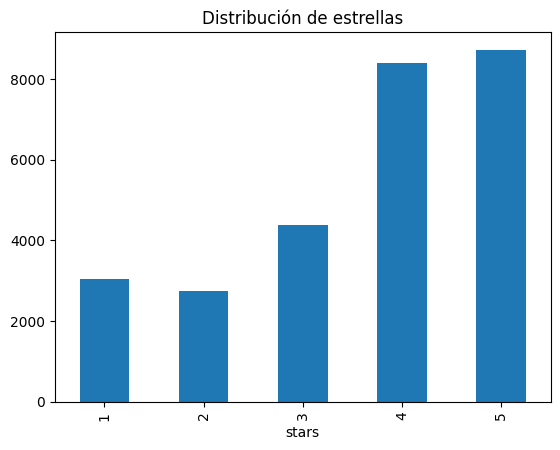

In [ ]:
# distribución de la variable "stars"
df['stars'].value_counts().sort_index().plot(kind='bar', title='Distribución de estrellas')

📌 Esto nos da una primera idea de cómo los usuarios califican los negocios.

La distribución de calificaciones muestra un predominio de experiencias positivas (4 y 5 estrellas), aunque también existe un segmento no menor de opiniones negativas (1 y 2 estrellas) que deben ser monitoreadas por su alto impacto en la percepción del negocio.

In [ ]:
# cantidad de reviews por negocio
df['business_id'].value_counts().describe()

,count
count,1320.000000
mean,20.674242
std,47.123585
min,1.000000
25%,4.000000
50%,7.000000
75%,18.000000
max,1068.000000


📌 Para ver si hay negocios con muchas reviews y otros con muy pocos.

<Axes: title={'center': 'Top 10 negocios con más reviews'}, xlabel='business_id'>

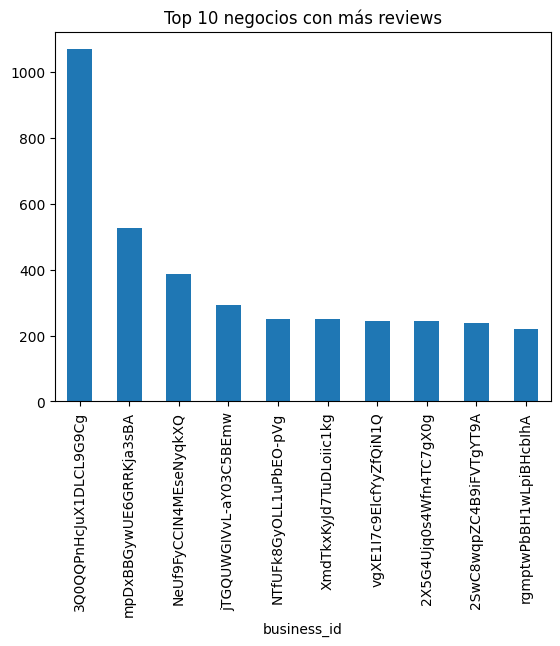

In [ ]:
# gráfico de cantidad de reviews por negocio
top_businesses = df['business_id'].value_counts().head(10)
top_businesses.plot(kind='bar', title='Top 10 negocios con más reviews')

📌 La base de datos no contiene la denominación o razón social de cada negocio. Únicamente tenemos a nuestro alcance los ID de cada uno.

In [ ]:
# longitud de las reviews
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
df['review_length'].describe()

,review_length
count,27290.000000
mean,121.034591
std,108.822311
min,1.000000
25%,48.000000
50%,90.000000
75%,159.000000
max,955.000000


📌 Esto ayuda para decidir estrategias de preprocesamiento o modelado.

### Revisión de columnas del dataset

| Columna       | ¿Necesaria?     | Comentario                                                                 |
|---------------|------------------|----------------------------------------------------------------------------|
| user_id       | ✅ Opcional       | Puede servir para análisis por usuario, pero no es clave para este análisis. |
| review_id     | ✅ Recomendado    | Puede ser útil como identificador único de cada fila.                      |
| text          | ✅ Obligatorio    | Es el corazón del análisis (NLP).                                          |
| votes.cool    | ❌ No necesario   | Podría descartarla si no analizo interacción.                            |
| votes.funny   | ❌ No necesario   | Igual que arriba.                                                          |
| votes.useful  | ❌ No necesario   | Igual que arriba.                                                          |
| business_id   | ✅ Obligatorio    | Clave para agrupar opiniones por negocio.                                  |
| stars         | ✅ Obligatorio    | Puede funcionar como proxy de sentimiento y para validarlo.                |
| date          | ✅ Recomendado    | Útil si quiero analizar evolución en el tiempo.                            |
| type          | ❌ Redundante     | Siempre es "review", así que puedo eliminarla.                             |


In [ ]:
# eliminar columnas innecesarias
cols_to_drop = ['votes.cool', 'votes.funny', 'votes.useful', 'type']

df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
# comprobación de columnas eliminadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        27290 non-null  object
 1   review_id      27290 non-null  object
 2   text           27290 non-null  object
 3   business_id    27290 non-null  object
 4   stars          27290 non-null  int64 
 5   date           27290 non-null  object
 6   review_length  27290 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


# Preprocesamiento

Primero que nada debemos importar spacy y cargar el modelo que querramos usar, en este caso, usaremos un modelo en inglés.

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md # en -> english .. core_web -> entrenado con diferentes textos de la web .. md -> medium

# vamos a estar utilizando un modelo en inglés de tamaño mediano que va a estar en spacy
# este código lo vamos a modificar de acuerdo al caso de uso

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# importaciones

# <- directorios ->
import os

# <- análisis y tratamiento de datos ->
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# <- análisis y tratamiento de datos tipo texto ->
import spacy
from functools import partial

# <- machine learning ->
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# CountVectorizer -> módulo para bag of words
# TfidfVectorizer -> módulo para TF-IDF

In [ ]:
# lo instanciamos
nlp = spacy.load("en_core_web_sm")

In [ ]:
# le pasamos entre () el nombre del modelo que decidimos descargar más arriba
# en este caso, elegimos un modelo spacy pre entrenado en el idioma inglés y de una precisión media

## Normalización de los documentos

In [ ]:
def clean_normalize_text(doc: str = None, tokenizer=True, c_stop_w=False, c_punct=False, lemmatizer=False, lower=False):
    doc_clean_normalize = []
    if tokenizer and doc:
        for token in nlp(doc):
            # Primero tomamos el texto normal
            token_clean_norm = token.text

            # Saltar stopwords
            if c_stop_w and token.is_stop:
                continue

            # Saltar signos de puntuación
            if c_punct and token.is_punct:
                continue

            # Aplicar lematización si se solicita
            if lemmatizer:
                token_clean_norm = token.lemma_

            # Aplicar minúsculas si se solicita
            if lower:
                token_clean_norm = token_clean_norm.lower()

            doc_clean_normalize.append(token_clean_norm)

    return ' '.join(doc_clean_normalize)

📄 Decisión sobre la normalización del texto

En el presente trabajo se decidió utilizar dos versiones diferentes del texto normalizado, con el objetivo de adaptarse a las necesidades específicas de cada análisis de Procesamiento de Lenguaje Natural (NLP). Cada técnica requiere distintos niveles de preprocesamiento para maximizar su rendimiento y evitar la pérdida de información relevante.

🧠 Versión 1: Normalización conservadora (orientada a NER y análisis lingüístico)

Esta versión se utiliza para tareas que requieren conservar la estructura gramatical del texto, como:

- Reconocimiento de entidades (NER)

- Etiquetado gramatical (POS)

- Extracción de fragmentos o frases nominales (noun chunks)

Para estos casos, se optó por preservar las stopwords, mantener las mayúsculas y evitar la lematización, ya que:

- Las entidades (como nombres de marcas, ciudades o personas) pueden perderse al convertir todo a minúsculas.

- Las stopwords y puntuaciones aportan contexto sintáctico necesario para la segmentación y detección de entidades.

🧹 Versión 2: Normalización completa (orientada a análisis temático)

Esta versión se utiliza para técnicas como:

- Extracción de palabras clave (TF-IDF)

- Modelado de tópicos (LDA, NMF)

- Nube de palabras (wordcloud)

- Análisis de sentimiento basado en léxico

En este caso, se aplicó una limpieza más agresiva, que incluye:

- Conversión a minúsculas (lower=True)

- Eliminación de puntuación (c_punct=True)

- Eliminación de stopwords (c_stop_w=True)

- Lematización (lemmatizer=True)

Esto permite reducir el ruido textual, mejorar la calidad del vocabulario y generar agrupaciones semánticas más coherentes para el análisis cuantitativo del contenido.

✅ Beneficio de la doble estrategia

Esta doble estrategia de normalización permite adaptar el dataset a múltiples técnicas de NLP sin comprometer la calidad de los resultados. De esta forma, se logra un análisis más robusto y ajustado a las fortalezas de cada herramienta utilizada.

In [ ]:
# Versión 1 - Texto orientado a análisis estructural/lingüístico (NER, POS, noun chunks)
df['normalized_text_ner'] = df['text'].apply(partial(
    clean_normalize_text,
    tokenizer=True,
    c_stop_w=False,
    c_punct=True,
    lemmatizer=False,
    lower=False
))

# Versión 2 - Texto orientado a análisis léxico/temático (lemmatización, keyword extraction, LDA, etc.)
df['normalized_text_keywords'] = df['text'].apply(partial(
    clean_normalize_text,
    tokenizer=True,
    c_stop_w=True,
    c_punct=True,
    lemmatizer=True,
    lower=True
))

Explicación de la decisión de NO eliminar stop words y NO convertir los textos a minúscula en la versión 1:

🔸 c_stop_w=False: Correcto si voy a trabajar luego con part of speach (POS) o reconocimiento de entidades (NER). Las stopwords pueden aportar contexto sintáctico.

🔸 lower=False: Clave para que NER diferencie, por ejemplo, entidades como "Apple" de "apple".

In [ ]:
# verificamos que se hayan aplicado los cambios
df.sample(5)

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords
5466,N6sSx40JqIla3cZBmLLzmA,kcmlOygz3Wl0vbdSjpiiFg,What is not to love about Mad Mex??? Although ...,hhNlQWaKqGbMPoeZHoL-IQ,5,2014-09-28,247,What is not to love about Mad Mex Although the...,love mad mex chain food a+ atmosphere fun \n\n...
5940,vZ52JWe3gIU7PUsQJ4MNlw,ntr4ez5b9gZqFLRIP-Rwgg,We've been here a few times before pirates' ga...,FtjvnLhh51ZBYEpKAARaFQ,3,2015-08-23,42,We 've been here a few times before pirates ga...,time pirate game slightly limited large menu g...
25456,71Gnwsn6XGae6n1PEu72ng,oz-JwIcGHCIDi7L226SQtQ,Dead Roach on the Bamboo on my steam dumpling ...,4CPrhBc4Ado90fj7PG6jrA,1,2007-08-16,33,Dead Roach on the Bamboo on my steam dumpling ...,dead roach bamboo steam dumple basket get leav...
546,gJhd8oM1yRDDGe3SPaC5Gw,j7TfEsZYkO0ARRBnPyYLQA,"First off, I will say that I just moved here f...",McikHxxEqZ2X0joaRNKlaw,4,2011-01-18,462,First off I will say that I just moved here fr...,move california big patron rockbottom long bea...
13447,VEY1vr-ND7YUofcV6XZJCQ,_9EgcFNjS4Wm_Xjbre0TkA,"I hope this place is still open! It was cool,...",YrvU0K9sMG87vbRRrKs5UA,3,2008-08-01,81,I hope this place is still open It was cool ...,hope place open cool get touch screen game b...


# Procesamiento lingüístico

## Reconocimiento de entidades (NER)

NER es una tarea de etiquetado secuencial que trabaja directamente sobre el texto crudo o ligeramente preprocesado (como tokenizado, lematizado, etc.), pero no requiere vectorización previa como sí lo hacen modelos de clasificación o clustering.

In [ ]:
# función para obtener las entidades de un documento
def get_entities(text:str):

  doc = nlp(text)
  ents = []

  if doc.ents:
    for ent in doc.ents:
      ents.append(ent.text)
      # ents.append(ent.label_)

  return ents

In [ ]:
# ent.label_ -> además de identificar las entidades, nos da una descripcion a que corresponde. por ejemplo, organización, persona, etc

In [ ]:
# aplicar función get_entities
df["NER"] = df["normalized_text_ner"].apply(get_entities)
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ..."
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb]
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]"
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,..."
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]"


Es normal que muchos registros tengan NER = [], es decir, ninguna entidad reconocida. No entraremos en detalle en este caso, pero las causas podrían ser las siguientes:
- La review no menciona ninguna entidad nombrada
- El modelo NER de spacy no detecta entidades genéricas o informales
- Entidades fuera del vocabulario del modelo
- El texto es muy corto

EXPLODE

La función explode() en pandas se usa para "descomprimir" listas dentro de una columna: convierte una fila con una lista en múltiples filas, cada una con un solo elemento de la lista. Se respeta el número de índice original.

Puede ser útil para:
- Contar entidades fácilmente
- Filtrar, agrupar o analizar entidades individuales
- Normalizar entidades una por una

In [ ]:
# aplicar función explode() y almacenar en una variable diferente a la original para evitar aumentar mucho la dimensionalidad
df_ner_exploded = df.explode("NER")
df_ner_exploded.head(10)

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,Hoagie
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,30 years ago old
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,menu board booths
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,70s
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,Italian
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,the area year
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,Subway
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,Superb
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,the weekend
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,daily


In [ ]:
# convertir cada valor de la columna NER a texto (string)
df_ner_exploded['NER'] = df_ner_exploded['NER'].apply(str)

In [ ]:
# aplicar la normalización en su totalidad (c_stop_w=True, lower=True)
ner_normalize_partial_function = partial(clean_normalize_text, tokenizer=True, c_stop_w=True, c_punct=True, lemmatizer=True, lower=True)

# aplicar la normalización a la columna NER
df_ner_exploded['NER'] = df_ner_exploded['NER'].apply(func=ner_normalize_partial_function)

In [ ]:
# comprobar que se haya aplicado correctamente la función explode()
df_ner_exploded.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,hoagie
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,30 year ago old
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,menu board booth
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,70
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,italian


Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estas reviews.

Obtener el top 20 de entidades más frecuentes.

In [ ]:
top_20_entities = df_ner_exploded['NER'].value_counts().head(20)
top_20_entities

,count
NER,
,14463
pittsburgh,3322
nan,2840
charlotte,2494
day,1661
2,1642
night,1584
italian,1463
3,1435


Valor "en blanco" con un conteo de 14.463, en realidad representa las filas donde la columna NER contiene el valor NaN (Not a Number) o strings vacíos, es decir, casos donde no se extrajo ninguna entidad reconocida de la review original.

✅ ¿Cómo lo interpreto?

- Es normal que aparezcan NaN o string vacíos tras aplicar explode() sobre una lista vacía ([]). Al utilizar la función explode(), cada fila con lista vacía se transforma en una fila con NaN o string vacíos.

- En este caso, 14.463 reviews no tienen entidades reconocidas.

Como quiero seguir trabajando solo con entidades válidas, procedo a filtrarlos:

In [ ]:
def clean_ner_column(df, ner_column='NER'):
    """
    Limpia la columna de entidades reconocidas (NER):
    - Elimina NaN reales
    - Elimina strings vacíos
    - Elimina strings como 'nan' o solo espacios
    Devuelve el DataFrame filtrado.
    """
    df_cleaned = df.copy()

    # Convertir a string por si hay objetos mezclados
    df_cleaned[ner_column] = df_cleaned[ner_column].astype(str)

    # Eliminar strings vacíos, espacios y 'nan' en texto
    df_cleaned = df_cleaned[
        (df_cleaned[ner_column].str.strip() != '') &
        (df_cleaned[ner_column].str.lower().str.strip() != 'nan')
    ]

    return df_cleaned

In [ ]:
df_ner_exploded_clean = clean_ner_column(df_ner_exploded, ner_column='NER')

Obtener el top 20 de entidades más frecuentes.

In [ ]:
top_20_entities = df_ner_exploded_clean['NER'].value_counts().head(20)
top_20_entities

,count
NER,
pittsburgh,3322
charlotte,2494
day,1661
2,1642
night,1584
italian,1463
3,1435
year,1405
5,1297


Vemos que se eliminaron los 14.463 casos con valor "en blanco" correctamente.

In [ ]:
# convertir value_counts() a un dataframe para poder graficar
top_20_df = top_20_entities.reset_index()
top_20_df.columns = ['entity', 'count']

<ipython-input-44-38446c735252>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_df, y='entity', x='count', palette='viridis')


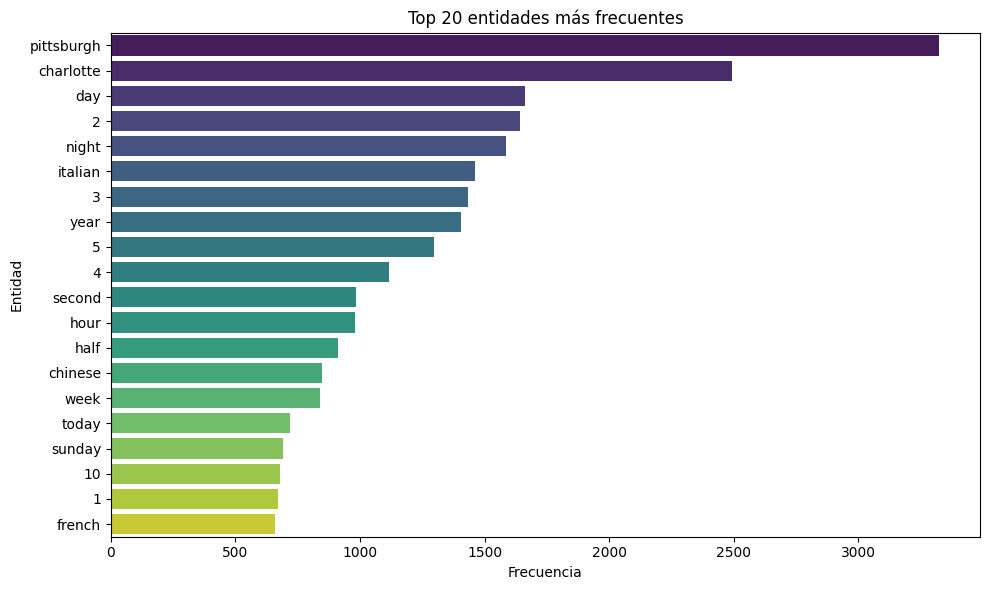

In [ ]:
# gráfico con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_df, y='entity', x='count', palette='viridis')

plt.title('Top 20 entidades más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Entidad')
plt.tight_layout()
plt.show()

El top 20 de entidades extraídas con NER nos da señales interesantes sobre qué conceptos, lugares o ideas se mencionan con mayor frecuencia en las reviews de los usuarios.

📌 POSIBLES CONCLUSIONES

1. Ubicaciones populares

pittsburgh y charlotte aparecen muy frecuentemente → podrían ser ciudades donde hay mayor concentración de reviews.

2. Menciones temporales frecuentes

Entidades como day, night, year, hour, week, today, sunday, second, half → indican que los usuarios suelen contextualizar sus opiniones en términos de tiempo.

3. Menciones a tipos de comida o cultura

italian, chinese, french → indican que los usuarios frecuentemente mencionan el tipo de cocina.

4. Frecuencia de números

1, 2, 3, 4, 5, 10, etc → aunque son comunes, no aportan mucho valor directamente como entidades, así que podríamos filtrarlos en análisis más finos.


## Part of speech (POS)

In [ ]:
# Part of speech = etiquetado gramatical

POS es el proceso mediante el cual vamos a clasificar a las palabras de un texto en **categorías gramaticales**. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, buscamos identificar sustantivos, verbos, adjetivos, etc, dentro de un texto.

Al igual que NER, para identificar POS en palabras de un texto, podemos utilizar los modelos de spacy que funcionan muy bien.

| Etiqueta | Nombre                         | Ejemplo                     | Función                                                   |
|----------|--------------------------------|-----------------------------|------------------------------------------------------------|
| `NOUN`   | Sustantivo                     | libro, perro, casa          | Nombra personas, lugares, cosas o ideas                   |
| `PROPN`  | Nombre propio                  | María, España, Google       | Tipo especial de sustantivo                               |
| `PRON`   | Pronombre                      | él, ella, eso, nosotros     | Sustituye a un sustantivo                                 |
| `VERB`   | Verbo                          | correr, ser, estudiar       | Expresa acciones, estados o procesos                      |
| `ADJ`    | Adjetivo                       | rojo, alto, feliz           | Describe o califica un sustantivo                         |
| `ADV`    | Adverbio                       | rápidamente, muy, nunca     | Modifica un verbo, adjetivo u otro adverbio              |
| `DET`    | Determinante                   | el, la, un, esta            | Introduce y especifica un sustantivo                     |
| `ADP`    | Adposición (preposición)       | en, sobre, bajo             | Relaciona palabras dentro de la oración                  |
| `CONJ`   | Conjunción                     | y, o                        | Conecta palabras u oraciones                             |
| `CCONJ`  | Conjunción coordinante         | pero, y, o                  | Conecta elementos equivalentes                           |
| `SCONJ`  | Conjunción subordinante        | porque, aunque, si          | Introduce cláusulas subordinadas                         |
| `NUM`    | Numeral                        | uno, dos, primero           | Indica cantidad u orden                                  |
| `INTJ`   | Interjección                   | ¡ay!, ¡hola!, ¡uf!          | Expresa emociones o reacciones                           |
| `AUX`    | Verbo auxiliar                 | haber, estar, ser           | Acompaña a un verbo principal                            |
| `PART`   | Partícula                      | no, se                      | Tiene funciones gramaticales especiales                  |
| `SYM`    | Símbolo                        | $, %, ©                     | Representa símbolos no lingüísticos                      |
| `X`      | Otro / desconocido             | —                           | Palabras que no encajan en otras clases                  |


En este caso, únicamente se estarán extrayendo los sustantivos.


In [ ]:
# extraer únicamente los sustantivos (nouns)
def get_nouns(text):
  doc = nlp(text)
  nouns = []

  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)

  return nouns

In [ ]:
# aplicar la función get_nouns() sobre el dataframe
df["NOUNS"] = df["normalized_text_ner"].apply(get_nouns)

Esto me devuelve una lista de sustantivos por cada review.

In [ ]:
# para saber cuáles son los 20 sustantivos más comunes
df_nouns_exploded = df.explode('NOUNS')

In [ ]:
top_nouns = df_nouns_exploded['NOUNS'].value_counts().head(20)
top_nouns

,count
NOUNS,
food,13796
place,13780
time,9086
service,7580
restaurant,4324
people,4284
staff,4056
bar,3971
night,3523


Nube de palabras con los 20 sustantivos más frecuentes:

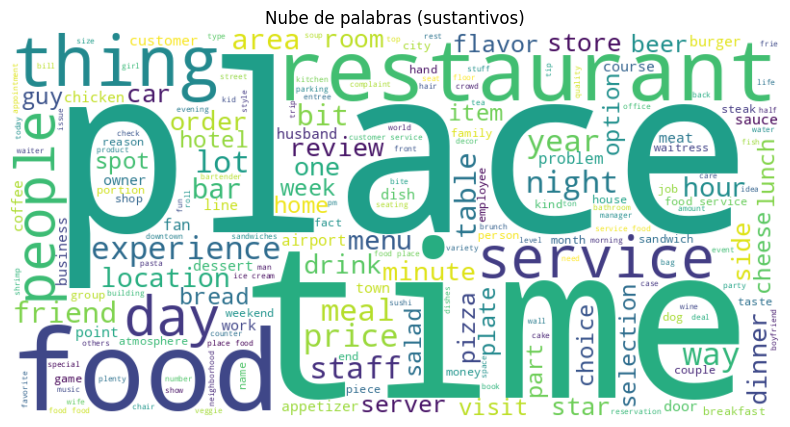

In [ ]:
from wordcloud import WordCloud

# unir todos los sustantivos en un solo string
noun_text = ' '.join(df_nouns_exploded['NOUNS'].dropna().astype(str))

# crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(noun_text)

# mostrar
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras (sustantivos)')
plt.show()

📌 POSIBLES CONCLUSIONES

1. Lo culinario predomina: comida, ingredientes y platos son altamente mencionados: food, chicken, pizza, cheese, sauce.

2. El entorno importa: palabras como place, area, room, bar, night sugieren que la experiencia no es solo la comida, sino también ambiente y contexto.

3. Factores de servicio y trato son fundamentales: service, staff, people.

4. Momento de la experiencia: day, night, time, lunch muestran que los usuarios contextualizan cuándo fue su visita.

5. Menciones genéricas (way, experience) podrían desglosarse o analizarse en combinación con sentimiento o adjuntos para entender si son positivos o negativos.



## Noun chunks

In [ ]:
# Noun chunks = frases nominales

Spacy también nos permite extraer "noun chunks" de un texto. Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

In [ ]:
# los noun chunks lo podemos ver como una síntesis de cada documento

In [ ]:
# crear una función para extraer los noun chunks
def get_noun_chunks(text:str):
  doc = nlp(text)
  nc_list = []
  for nc in doc.noun_chunks:
    nc_list.append(nc)

  return nc_list

In [ ]:
# aplicar la función get_noun_chunks() sobre el dataframe
df["NOUN_CHUNKS"] = df["normalized_text_ner"].apply(get_noun_chunks)

In [ ]:
# conteo de cuales son las reviews con más noun chunks
df["noun_chunk_count"] = df["NOUN_CHUNKS"].apply(len)

# ordenar por cantidad y mostrar texto + chunks
df.sort_values("noun_chunk_count", ascending=False)[["text", "NOUN_CHUNKS", "noun_chunk_count"]].head(10)

,text,NOUN_CHUNKS,noun_chunk_count
14747,"Last summer, I knew that my then-boyfriend/now...","[(I), (my, then, boyfriend), (now, fiance), (H...",296
7121,WARNING. DO NOT GO HERE.\n\nMy family was visi...,"[(WARNING), (My, family), (my, sister), (Pitts...",292
19338,The worst dry cleaners ever with the shittiest...,"[(The, worst, dry, cleaners), (the, shittiest,...",282
22995,"NOTE: Unlike BOA, I am happy to be contacted a...","[(BOA), (I), (my, experiences), (everyone), (w...",272
26716,If I could give the Hertz at Charlotte Douglas...,"[(I), (the, Hertz), (Charlotte, Douglass, Airp...",270
26731,I have been renting from Hertz consistently si...,"[(I), (Hertz), (you), (a, gold, member), (a, g...",266
6287,This was a pleasant surprise and a great exper...,"[(This), (a, pleasant, surprise), (a, great, e...",264
10947,I AM BOYCOTTING ALEXANDER'S FOR LIFE!!! The ma...,"[(I), (ALEXANDER), (LIFE), (The, manager), (AT...",263
16096,THE GOOD: \n1.They will give you proper value ...,"[(THE, GOOD, \n , 1.They), (you), (proper, val...",262
22796,"It was one of those unanticipated nights, wher...","[(It), (those, unanticipated, nights), (long, ...",260


In [ ]:
# explode()
df_nc_exploded = df.explode("NOUN_CHUNKS")
df_nc_exploded["NOUN_CHUNKS"] = df_nc_exploded["NOUN_CHUNKS"].astype(str)

# conteo
top_noun_chunks = df_nc_exploded["NOUN_CHUNKS"].value_counts().head(20)

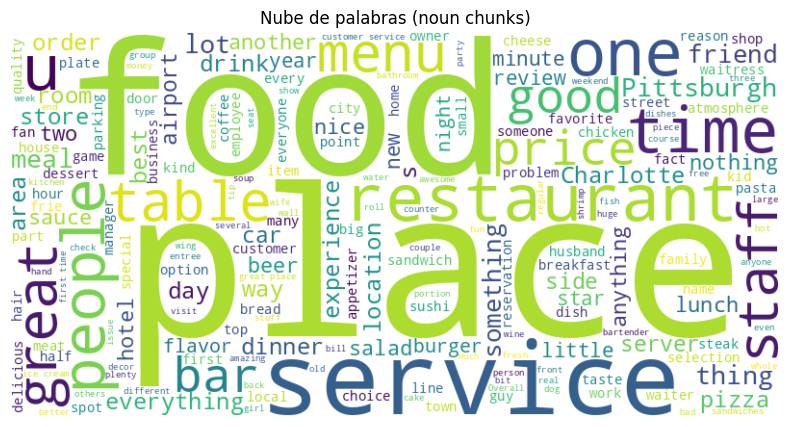

In [ ]:
# nube de palabras de noun chunks
from wordcloud import WordCloud

noun_chunk_text = ' '.join(df_nc_exploded["NOUN_CHUNKS"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(noun_chunk_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras (noun chunks)')
plt.show()

📌 POSIBLES CONCLUSIONES

La nube de palabras generada permite identificar los noun chunks más mencionados en las reviews. Entre los más frecuentes se destacan:

- Comida y menú: the food, the pizza, the chicken, the meal, the drink, the sauce, the menu.

- Lugar y ambiente: this place, the restaurant, the bar, the store, the area, the room.

- Atención al cliente: the service, the staff, our server, the waitress, the manager.

- Contexto general: a great time, the atmosphere, the experience, the problem, the issue, the way.

- Entidades geográficas: Pittsburgh, Charlotte (lo que indica menciones a ubicaciones específicas dentro de las reseñas).

Conclusiones

- Dimensiones clave del servicio: El uso frecuente de chunks relacionados con comida, atención y lugar muestra que estos son los ejes centrales de la experiencia del usuario.

- Nombres propios y ubicaciones: La aparición de ciudades indica que muchos usuarios mencionan explícitamente la ubicación del negocio, lo cual podría cruzarse con análisis geoespaciales o segmentaciones regionales.

- Potencial para análisis de sentimiento temático: Al segmentar los chunks por polaridad (por ejemplo, usando TextBlob), se podría analizar qué temas aparecen con más frecuencia en opiniones positivas vs. negativas.

## Sentencizer

El Sentencizer en spacy es un componente del pipeline de procesamiento de texto que se encarga de dividir un texto en oraciones (sentencias), sin necesidad de realizar un análisis gramatical profundo.

Se recomienda no utilizar ninguna normalización previa que modifique la estructura del texto. De hecho, conviene trabajar con el texto original, ya que los signos de puntuación son fundamentales para detectar correctamente los límites oracionales.


In [ ]:
# Sentencizer = tokenización por oración o sentencia

Crear una función que dado un texto, nos retorne la cantidad de oraciones por review. Lo cual es útil para realizar análisis estructurales del texto.

In [ ]:
def get_sents(text):
  doc = nlp(text)
  return len(list(doc.sents))

In [ ]:
df["SENTENCES"] = df["text"].apply(get_sents)

In [ ]:
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,NOUNS,NOUN_CHUNKS,noun_chunk_count,SENTENCES
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...","[institution, throwback, years, menu, board, b...","[(Mr, Hoagie), (an, institution), (it), (a, th...",22,5
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],"[food, Superb, customer, service, machines, pl...","[(Excellent, food, Superb, customer, service),...",7,3
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]","[place, weekend, staff, order, spot, veggies, ...","[(this, place), (the, weekend), (the, staff), ...",20,6
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...","[food, thing, wings, wings, salt, wings, night...","[(All, the, food), (the, best, thing), (they),...",18,11
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]","[place, wing, night, wings, time, wings, wings...","[(We), (this, place), (their, wing, night), (W...",37,8


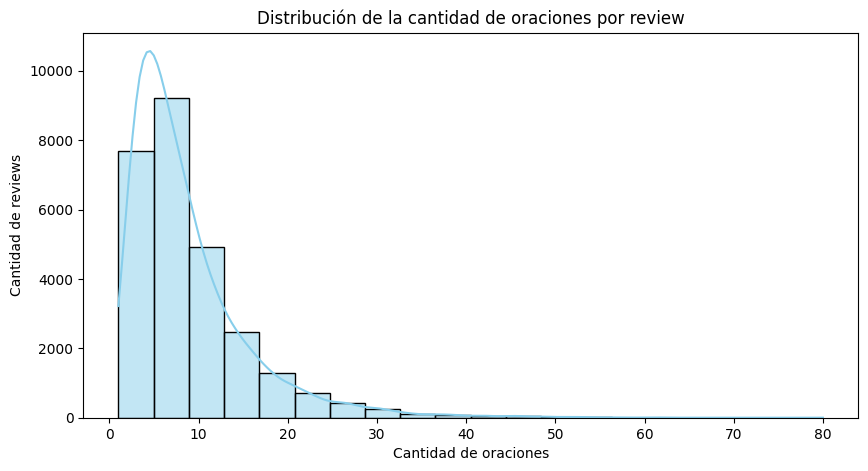

In [ ]:
# distribución de cantidad de oraciones por review
plt.figure(figsize=(10, 5))
sns.histplot(df["SENTENCES"], bins=20, kde=True, color='skyblue')
plt.title("Distribución de la cantidad de oraciones por review")
plt.xlabel("Cantidad de oraciones")
plt.ylabel("Cantidad de reviews")
plt.show()

La distribución es claramente asimétrica a la derecha, lo cual es esperable en este tipo de datos (reviews de usuarios).

📌 POSIBLES CONCLUSIONES

1. La mayoría de las reviews son breves:

- El pico de la distribución está entre 2 y 6 oraciones.

- Esto indica que la mayoría de los usuarios deja comentarios relativamente cortos y directos.

2. Distribución sesgada positivamente (asimetría a la derecha):

- Existen algunas reviews mucho más largas (con más de 20 o incluso 50 oraciones), pero son casos aislados.

- Este tipo de distribución sugiere que hay una minoría muy expresiva, probablemente usuarios muy involucrados con su experiencia.

3. Valor atípico esperado pero no extremo:

- Aunque hay reviews con más de 60 oraciones, no se observa un corte abrupto ni errores aparentes.

- Se podría revisar alguna manualmente para verificar que no se trate de ruido (ej. texto repetido o mal parseado).

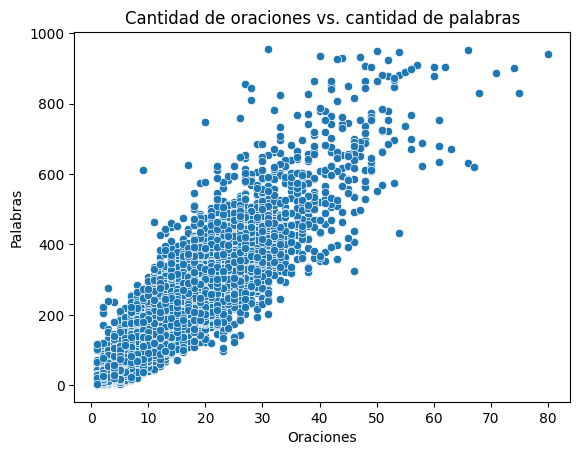

In [ ]:
# relación entre longitud del texto y número de oraciones
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

sns.scatterplot(data=df, x="SENTENCES", y="word_count")
plt.title("Cantidad de oraciones vs. cantidad de palabras")
plt.xlabel("Oraciones")
plt.ylabel("Palabras")
plt.show()

Correlación positiva entre la cantidad de oraciones y la cantidad de palabras por review.

📌 POSIBLES CONCLUSIONES

1. Fuerte correlación positiva:

- A mayor número de oraciones, mayor es la cantidad de palabras.

- Esto es esperable, ya que las reviews largas suelen estar compuestas por múltiples oraciones extensas.

2. Variabilidad dentro de un mismo rango de oraciones:

- Por ejemplo, para reviews con ~10 oraciones, la cantidad de palabras puede oscilar entre ~100 y ~400.

- Esto sugiere diferencias en el estilo de escritura: algunos usuarios escriben oraciones más concisas, otros más elaboradas.

3. Outliers verticales:

- Algunas reviews con pocas oraciones contienen muchas palabras, indicando oraciones muy largas o mal puntuadas (posible ruido que podría analizar o limpiar).

In [ ]:
# promedio de oraciones por review
avg_sentences = df["SENTENCES"].mean()
print(f"Promedio de oraciones por review: {avg_sentences:.2f}")

Promedio de oraciones por review: 8.78


## Wordcloud

Los wordclouds se utilizan para visualizar textos.

Son muy utilizados para identificar las palabras que más veces aparecen en un texto.

Las librerías utilizadas hasta ahora, no tienen la capacidad de graficar wordclouds, por lo tanto, se debe instalar una librería específica para esto.

Instalar la librería necesaria: https://pypi.org/project/wordcloud/

In [ ]:
# Wordcloud = nube de palabras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,NOUNS,NOUN_CHUNKS,noun_chunk_count,SENTENCES,word_count
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...","[institution, throwback, years, menu, board, b...","[(Mr, Hoagie), (an, institution), (it), (a, th...",22,5,83
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],"[food, Superb, customer, service, machines, pl...","[(Excellent, food, Superb, customer, service),...",7,3,23
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]","[place, weekend, staff, order, spot, veggies, ...","[(this, place), (the, weekend), (the, staff), ...",20,6,73
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...","[food, thing, wings, wings, salt, wings, night...","[(All, the, food), (the, best, thing), (they),...",18,11,76
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]","[place, wing, night, wings, time, wings, wings...","[(We), (this, place), (their, wing, night), (W...",37,8,137


In [ ]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
# en este caso lo estaremos aplicando únicamente a la columna NER
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       #stopwords = nlp.Defaults.stop_words,
                       ).generate(str(df["NER"].values))

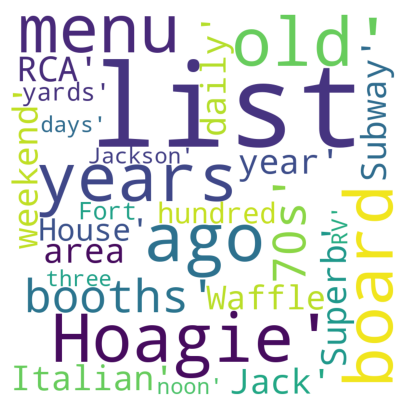

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(word_cloud)
plt.axis("off") # elimina los ejes x e y
plt.show()

# Análisis semántico

In [ ]:
# instalación librerías para análisis semántico
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Text blob

TextBlob es una biblioteca de procesamiento de lenguaje natural (NLP) en Python, construida sobre NLTK y Pattern, que permite, entre otras cosas, analizar el sentimiento de un texto (polarity y subjectivity).

In [ ]:
# Text blob = análisis de sentimientos

POLARITY

Puede tomar valores en el rango [-1, 1], donde -1 define un sentimiento negativo y 1 un sentimiento positivo.
Las palabras de negación, invierten la polaridad.

SUBJECTIVITY

Puede tomar valores en el rango [0, 1].
Cuantifica la cantidad de opinión personal que contiene el texto. Mientras más alta sea, significa que el texto contiene muchas opiniones personales en lugar de información basada en hechos.

Función get_sentiment_features() que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Extendemos la función para retornar tanto la etiqueta como los valores de polarity y subjectivity.

In [ ]:
from textblob import TextBlob

def get_sentiment_features(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if polarity > 0.1:
        label = "POS"
    elif polarity < -0.1:
        label = "NEG"
    else:
        label = "NEU"

    return pd.Series({
        "polarity": polarity,
        "subjectivity": subjectivity,
        "sentiment_label": label
    })

In [ ]:
df[['polarity', 'subjectivity', 'sentiment_label']] = df['text'].apply(get_sentiment_features)

In [ ]:
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,NOUNS,NOUN_CHUNKS,noun_chunk_count,SENTENCES,word_count,polarity,subjectivity,sentiment_label
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...","[institution, throwback, years, menu, board, b...","[(Mr, Hoagie), (an, institution), (it), (a, th...",22,5,83,0.170339,0.326587,POS
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],"[food, Superb, customer, service, machines, pl...","[(Excellent, food, Superb, customer, service),...",7,3,23,0.933333,0.916667,POS
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]","[place, weekend, staff, order, spot, veggies, ...","[(this, place), (the, weekend), (the, staff), ...",20,6,73,0.255093,0.479630,POS
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...","[food, thing, wings, wings, salt, wings, night...","[(All, the, food), (the, best, thing), (they),...",18,11,76,0.569643,0.578571,POS
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]","[place, wing, night, wings, time, wings, wings...","[(We), (this, place), (their, wing, night), (W...",37,8,137,0.082843,0.554035,NEU


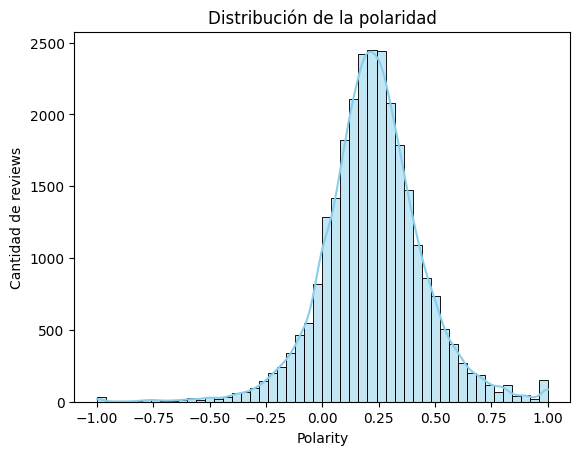

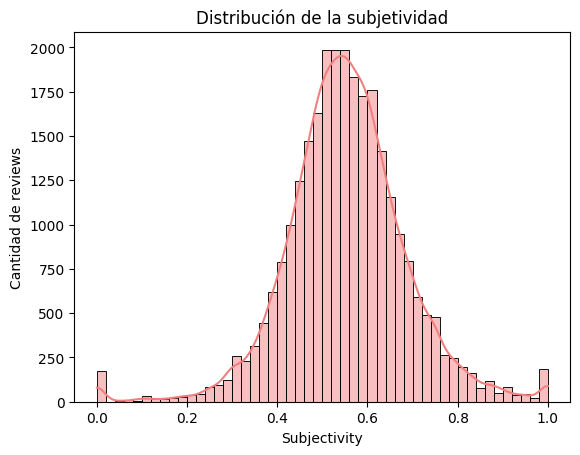

In [ ]:
# distribución de polaridad y subjetividad
sns.histplot(df['polarity'], kde=True, bins=50, color='skyblue')
plt.title("Distribución de la polaridad")
plt.xlabel("Polarity")
plt.ylabel("Cantidad de reviews")
plt.show()

sns.histplot(df['subjectivity'], kde=True, bins=50, color='lightcoral')
plt.title("Distribución de la subjetividad")
plt.xlabel("Subjectivity")
plt.ylabel("Cantidad de reviews")
plt.show()

📘 Análisis de distribución de la polaridad

1. Tendencia hacia la positividad:
Aunque hay una distribución simétrica, el pico se encuentra entre 0.2 y 0.3, lo que indica una ligera inclinación hacia reseñas positivas.

2. Simetría y forma normal:
La polaridad sigue una distribución normal centrada en valores levemente positivos, lo que refuerza la idea de que la mayoría de las experiencias reportadas fueron buenas o muy buenas.

3. Menos polaridad negativa:
La frecuencia de polaridades negativas (menores a 0) es notablemente baja, lo que sugiere que los usuarios escriben menos reseñas cuando tienen experiencias negativas, o bien que el modelo detecta pocas con esa orientación.

📘 Análisis de distribución de la subjetividad

1. Forma de campana centrada en 0.5-0.6:
La mayoría de las reviews tienen una subjetividad moderada, lo que implica que mezclan opiniones personales con descripciones objetivas. No predominan ni las reviews totalmente emocionales ni las completamente objetivas.

2. Simetría y baja dispersión:
La distribución es bastante simétrica, lo que indica una consistencia en el tono general de las opiniones. La mayoría de los usuarios escriben de manera similar en cuanto al grado de subjetividad.

3. Pocos extremos:
Hay muy pocas reviews con subjetividad cercana a 0 (muy objetivas) o cercana a 1 (muy subjetivas), lo cual sugiere que la mayoría de los comentarios no son ni puramente técnicos ni extremadamente emocionales.

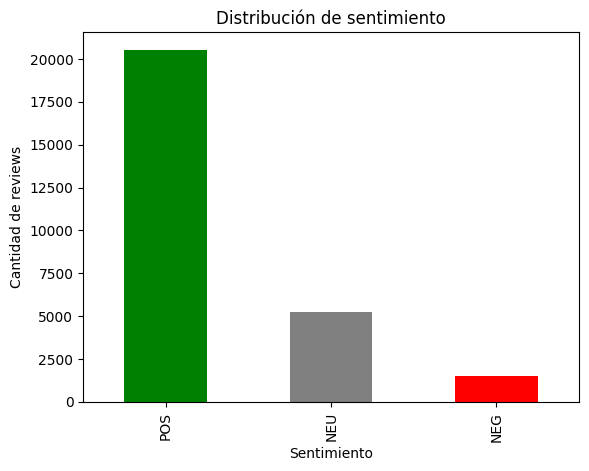

In [ ]:
# proporción de etiquetas de sentimiento (POS / NEU / NEG)
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Distribución de sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reviews")
plt.show()

📘 Análisis de distribución de sentimientos (POS, NEU, NEG)

- POS (positivo) domina ampliamente, con más de 20.000 reseñas.

- NEU (neutro) es la segunda categoría más común.

- NEG (negativo) es minoritaria.

📌 Conclusión: esto puede indicar una tendencia general de los usuarios satisfechos a compartir sus experiencias, o también que los negocios en Yelp suelen tener un buen desempeño percibido.
No necesariamente implica que los usuarios solo escriban cuando están satisfechos, sino que las reseñas recopiladas reflejan una mayoría de experiencias positivas.

<ipython-input-78-046962a3816a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stars', y='polarity', palette='coolwarm')


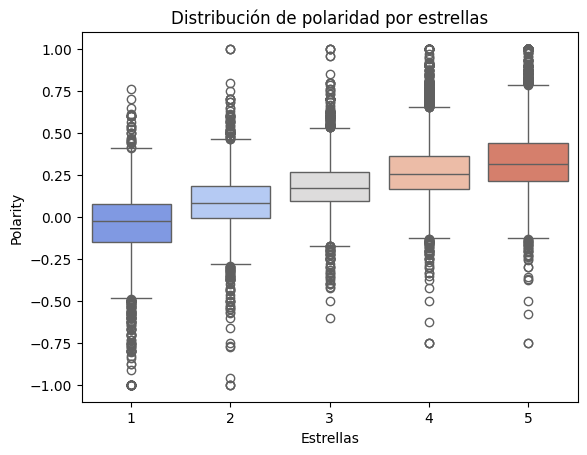

In [ ]:
# relación entre sentimiento y estrellas (stars)
sns.boxplot(data=df, x='stars', y='polarity', palette='coolwarm')
plt.title("Distribución de polaridad por estrellas")
plt.xlabel("Estrellas")
plt.ylabel("Polarity")
plt.show()

📘 Análisis de polaridad por estrellas (stars)

- Existe una relación clara entre la puntuación (stars) y la polaridad.

- Las reseñas de 5 estrellas tienen polaridades altas y menos dispersión.

- Las de 1 estrella tienden a polaridades negativas, aunque algunas presentan polaridad positiva (posible ironía o lenguaje ambiguo).

📌 Conclusión: Hay consistencia entre el sentimiento textual y la calificación numérica, aunque hay algunas excepciones que pueden deberse a matices del lenguaje.



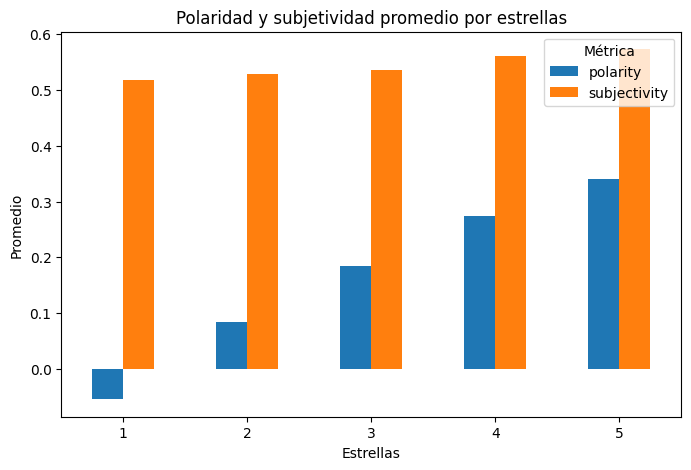

In [ ]:
# promedio de polaridad y subjectivity por estrellas (stars)
df.groupby('stars')[['polarity', 'subjectivity']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Polaridad y subjetividad promedio por estrellas")
plt.ylabel("Promedio")
plt.xlabel("Estrellas")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.show()

📘 Análisis de promedios de polaridad y subjetividad por estrellas

- A medida que aumentan las estrellas, aumenta la polaridad promedio.

- La subjetividad se mantiene relativamente constante, aunque es ligeramente mayor para calificaciones más altas.

📌 Conclusión: Las reseñas más positivas no solo son más favorables en tono, sino también más subjetivas, es decir, contienen más opiniones personales y emociones.

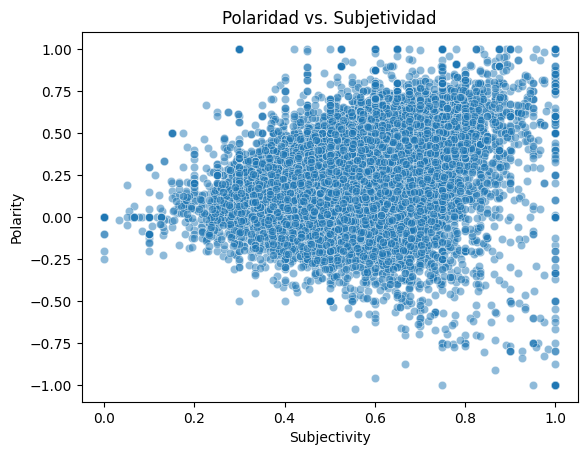

In [ ]:
# relación entre polaridad y subjetividad
sns.scatterplot(data=df, x='subjectivity', y='polarity', alpha=0.5)
plt.title("Polaridad vs. Subjetividad")
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")
plt.show()

📘 Análisis de polaridad vs. subjetividad

- Existe una ligera correlación positiva: a mayor subjetividad, mayor polaridad positiva.

- Hay muchas reseñas con alta subjetividad pero polaridad cercana a 0 (opiniones ambiguas o mixtas).

📌 Conclusión: Las reseñas altamente subjetivas suelen ser más emocionales, y tienden a ser positivas, pero no siempre.

📌 POSIBLES CONCLUSIONES

- El análisis de sentimiento con TextBlob resulta consistente con las calificaciones otorgadas por los usuarios.

- Se observa una predominancia del sentimiento positivo y una polaridad promedio ligeramente optimista, lo que podría estar influido por un sesgo de positividad típico en plataformas públicas.

- Las métricas de polaridad y subjetividad complementan las estrellas y ayudan a comprender mejor el tono y la intención de los textos.

Negocio con más comentarios positivos y negocio con más comentarios negativos

In [ ]:
# negocio con más comentarios positivos
top_positive = df[df['sentiment_label'] == 'POS']['business_id'].value_counts().idxmax()

# negocio con más comentarios negativos
top_negative = df[df['sentiment_label'] == 'NEG']['business_id'].value_counts().idxmax()

# mostrar ambos
print("Negocio con más reseñas positivas:", top_positive)
print("Negocio con más reseñas negativas:", top_negative)

Negocio con más reseñas positivas: 3Q0QQPnHcJuX1DLCL9G9Cg
Negocio con más reseñas negativas: 3Q0QQPnHcJuX1DLCL9G9Cg


Cabe destacar que no contamos con un dataframe que contenga los nombres de los negocios. Únicamente disponemos de los ID.

## Hugging face

Para hacer uso de esta librería haremos traducción de las reviews de inglés a español.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# cargar modelo de traducción inglés → español
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
# función de traducción
def translate(x: str) -> str:
    # Codifica el texto de entrada 'x' usando el tokenizer del modelo,
    # devolviendo tensores de PyTorch ('pt') para poder pasarlos al modelo.
    inputs = tokenizer.encode(text=x, return_tensors='pt')

    # Genera la traducción a partir de los tensores codificados usando el modelo preentrenado.
    # 'generate' produce una secuencia traducida basada en el texto de entrada.
    outputs = model.generate(inputs=inputs)

    # Decodifica los IDs de tokens generados por el modelo a texto humano legible.
    # outputs[0] representa la secuencia traducida (puede haber más de una).
    return tokenizer.decode(token_ids=outputs[0])

In [ ]:
# traducir solo una muestra (para pruebas)
translated = df['text'].head().apply(translate)
translated

,text
0,<pad> El Sr. Hoagie es una institución. Camina...
1,<pad> Excelente comida. Excelente servicio al ...
2,"<pad> Sí, este lugar es un poco fuera de fecha..."
3,<pad> Toda la comida es genial aquí. Pero lo m...
4,<pad> Hemos comprobado este lugar el pasado lu...


## KeyBERT

In [ ]:
# extracción de keywords (palabras claves)

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- top_n: cantidad de keywords por review
- keyphrase_ngram_range: cantidad de palabras por keyword (keyphrase)

In [ ]:
# extraer keywords desde texto original
df["KEYWORDS"] = df['text'].apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

 Aplicamos df['text'] en lugar de df['normalized_text_keywords']. Ya que al aplicarlo sobre df['normalized_text_keywords'], funcionaba mal por tratarse de textos muy reducidos o normalizados. BERT no encuentra unidades semánticas claras y empieza a elegir tokens sueltos sin sentido, por ejemplo ["s", "m", "b"].

In [ ]:
# top_n=3 -> cuantas keywords queremos que encuentre por cada documento. En este caso, las 3 palabras claves que estén mas cerca del vector del documento
# keyphrase_ngram_range=(1,1) -> cantidad de palabras mínimas y máximas que tiene que tener el enegrama
# por lo tanto, va a buscar palabras únicas que tengan 1 como mínimo y 1 como máximo
# si tuviera (1,2) voy a tener palabras únicas (1 palabra) y palabras compuestas (2 palabras)

In [ ]:
# comprobamos que se haya aplicado correctamente la función
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,NOUNS,NOUN_CHUNKS,noun_chunk_count,SENTENCES,word_count,polarity,subjectivity,sentiment_label,KEYWORDS
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...","[institution, throwback, years, menu, board, b...","[(Mr, Hoagie), (an, institution), (it), (a, th...",22,5,83,0.170339,0.326587,POS,"[(hoagie, 0.5947), (burger, 0.4778), (subway, ..."
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],"[food, Superb, customer, service, machines, pl...","[(Excellent, food, Superb, customer, service),...",7,3,23,0.933333,0.916667,POS,"[(mario, 0.4312), (food, 0.3599), (superb, 0.3..."
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]","[place, weekend, staff, order, spot, veggies, ...","[(this, place), (the, weekend), (the, staff), ...",20,6,73,0.255093,0.479630,POS,"[(weekend, 0.3106), (toppings, 0.3103), (veggi..."
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...","[food, thing, wings, wings, salt, wings, night...","[(All, the, food), (the, best, thing), (they),...",18,11,76,0.569643,0.578571,POS,"[(pittsburgh, 0.4482), (wings, 0.3863), (cajun..."
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]","[place, wing, night, wings, time, wings, wings...","[(We), (this, place), (their, wing, night), (W...",37,8,137,0.082843,0.554035,NEU,"[(wings, 0.4619), (wing, 0.3599), (cajun, 0.35..."


In [ ]:
# vemos que cada keyword nos la devuelve en formato de lista de tuplas
# cada keyword trae dos valores. Por un lado, la keyword como tal y por el otro, el score
# el score significa el peso que va a tener esa palabra dentro del documento en sí respecto a todas las palabras que hay

Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las keywords:

In [ ]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,NOUNS,NOUN_CHUNKS,noun_chunk_count,SENTENCES,word_count,polarity,subjectivity,sentiment_label,KEYWORDS
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...","[institution, throwback, years, menu, board, b...","[(Mr, Hoagie), (an, institution), (it), (a, th...",22,5,83,0.170339,0.326587,POS,"[hoagie, burger, subway]"
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],"[food, Superb, customer, service, machines, pl...","[(Excellent, food, Superb, customer, service),...",7,3,23,0.933333,0.916667,POS,"[mario, food, superb]"
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]","[place, weekend, staff, order, spot, veggies, ...","[(this, place), (the, weekend), (the, staff), ...",20,6,73,0.255093,0.479630,POS,"[weekend, toppings, veggies]"
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...","[food, thing, wings, wings, salt, wings, night...","[(All, the, food), (the, best, thing), (they),...",18,11,76,0.569643,0.578571,POS,"[pittsburgh, wings, cajun]"
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]","[place, wing, night, wings, time, wings, wings...","[(We), (this, place), (their, wing, night), (W...",37,8,137,0.082843,0.554035,NEU,"[wings, wing, cajun]"


In [ ]:
# pasamos a tener una lista con las 3 keywords, sin el score

Ahora podemos ver la popularidad de las keywords:

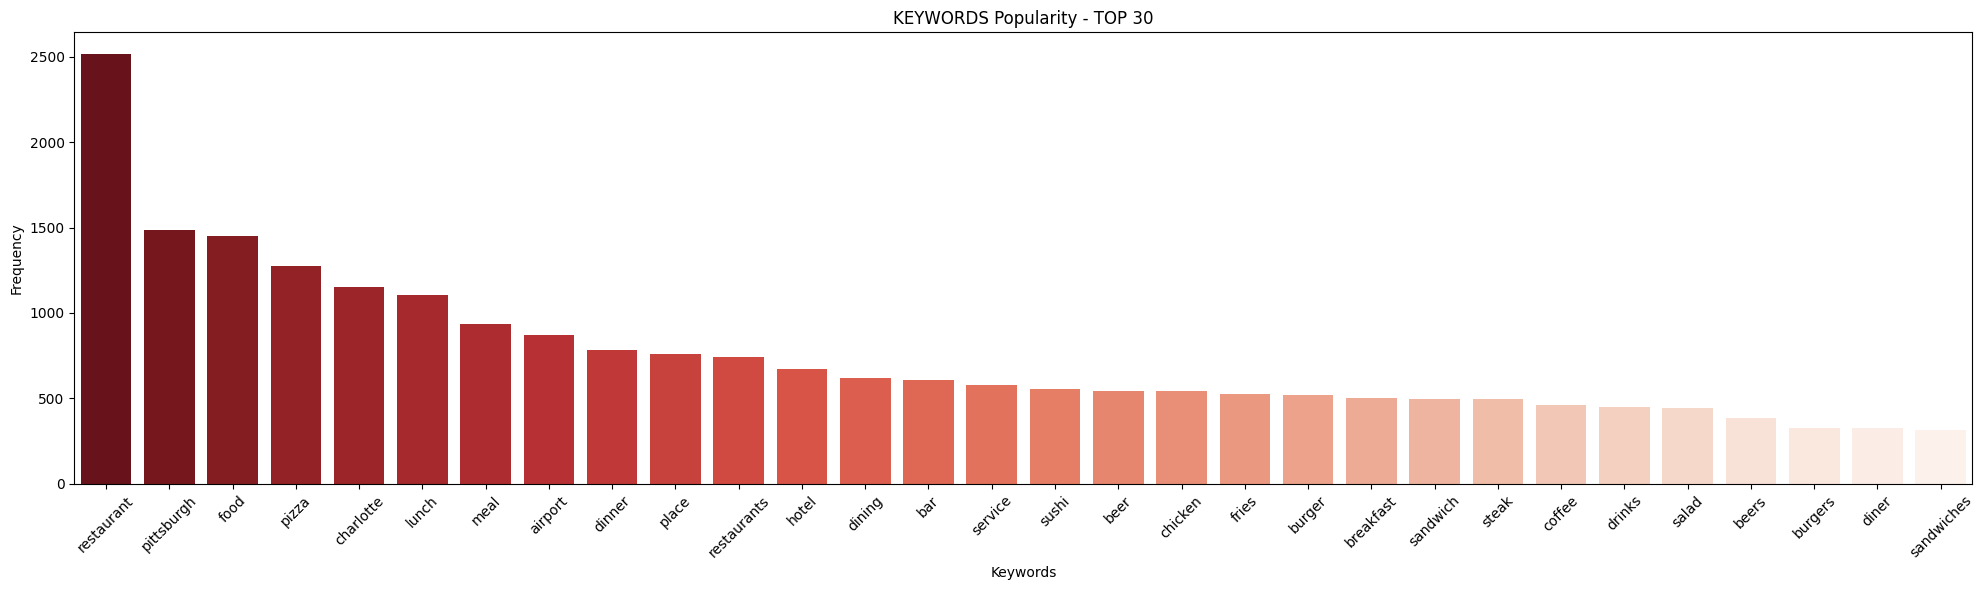

In [ ]:
# expandimos la columna de listas en múltiples filas
exploded_keywords = df.explode("KEYWORDS").reset_index(drop=True) # explode -> descomprimir el keyword en 3 filas respetando el nro de índice

# creamos la gráfica
plt.figure(figsize=(20,6))
sns.countplot(
    x=exploded_keywords["KEYWORDS"],
    order=exploded_keywords["KEYWORDS"].value_counts().index[:30], # para que lo ordene de mayor a menor
    palette='Reds_r' # paleta de color
)
plt.title("KEYWORDS Popularity - TOP 30")
plt.xticks(rotation=45)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Agrupar keywords por negocio usando exploded_keywords

In [ ]:
from collections import Counter

# agrupamos las keywords ya explotadas
keywords_by_business = (
    exploded_keywords[["business_id", "KEYWORDS"]]
    .dropna()
    .groupby("business_id")["KEYWORDS"]
    .apply(list)  # junta todas las keywords por negocio
    .reset_index()
)

# calculamos las top 10 keywords por negocio
keywords_by_business["TOP_KEYWORDS"] = keywords_by_business["KEYWORDS"].apply(
    lambda x: [kw for kw, _ in Counter(x).most_common(10)]
)

# mostramos un ejemplo de 5 negocios
keywords_by_business[["business_id", "TOP_KEYWORDS"]].head(5)

,business_id,TOP_KEYWORDS
0,--UE_y6auTgq3FXlvUMkbw,"[diner, food, ritters, pittsburgh, waitresses,..."
1,-1t3U6osBvqFLHseoCxiIA,"[energy, electricity, electric, company, place..."
2,-6JY1T0w4XETux5kGOj84g,"[bar, place, restaurant, fox, food, drinks, be..."
3,-Am2JVkb7nwvBAUwSugG0A,"[breakfast, lunch, meal, food, charlotte, dinn..."
4,-FQL3Q-Prwxp577SFr5MfA,"[suits, suit, belt, pocket, shop, tailoring, s..."


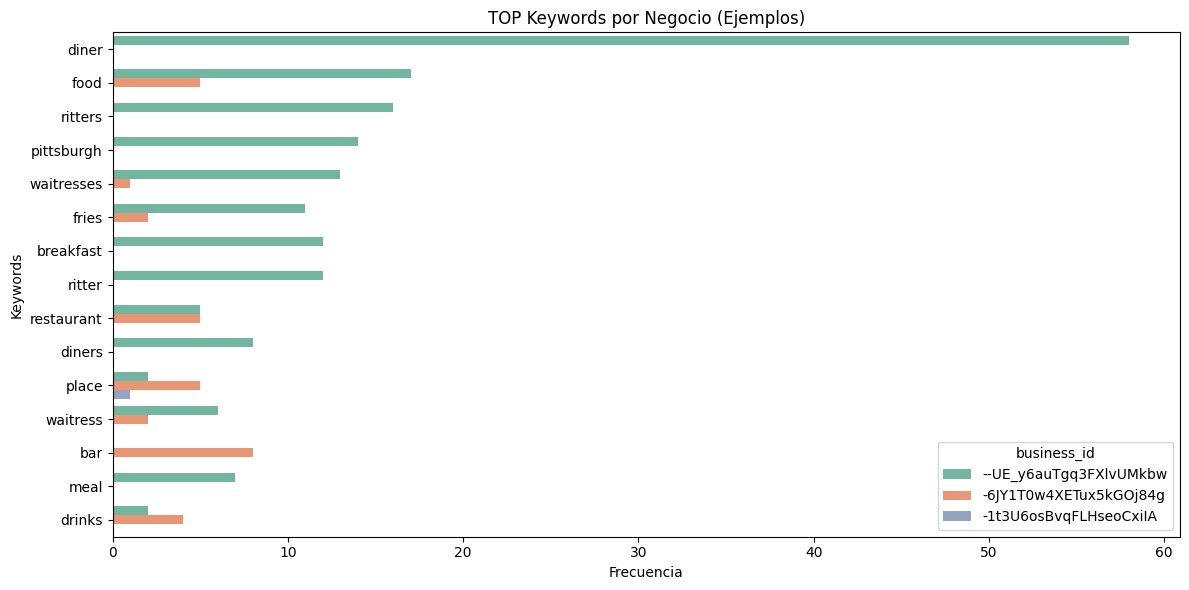

In [ ]:
# elegimos 3 negocios para visualizar
sample_ids = keywords_by_business["business_id"].head(3).tolist()  # o elegí manualmente

# filtramos las filas del DataFrame exploded
sample_keywords = exploded_keywords[exploded_keywords["business_id"].isin(sample_ids)]

# creamos la visualización
plt.figure(figsize=(12, 6))
sns.countplot(
    data=sample_keywords,
    y="KEYWORDS",
    hue="business_id",
    order=sample_keywords["KEYWORDS"].value_counts().index[:15],  # top 15 keywords generales
    palette="Set2"
)
plt.title("TOP Keywords por Negocio (Ejemplos)")
plt.xlabel("Frecuencia")
plt.ylabel("Keywords")
plt.legend(title="business_id")
plt.tight_layout()
plt.show()

## BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [ ]:
# identificar tópicos a lo largo de todo el corpus
# la idea es a partir de distintos documentos de texto plano, identificar tópicos recurrentes
# podemos verlo como un problema de clusterización de documentos
# no necesitamos especificar la cantidad de tópicos que queres extraer de antemano

In [ ]:
from bertopic import BERTopic

In [ ]:
%%time
df = df[df["normalized_text_keywords"].notnull()] # verificamos que la columna no tenga nulos
topic_model = BERTopic(calculate_probabilities=True, verbose=True) # si le pedimos que nos calcule las probabilidades, nos va a devolver dos valores -> topics, probs
topics, probs = topic_model.fit_transform(df["normalized_text_keywords"].values)

2025-05-24 01:35:04,076 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/853 [00:00<?, ?it/s]

2025-05-24 01:52:22,735 - BERTopic - Embedding - Completed ✓
2025-05-24 01:52:22,736 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-24 01:53:30,781 - BERTopic - Dimensionality - Completed ✓
2025-05-24 01:53:30,784 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-24 01:54:56,954 - BERTopic - Cluster - Completed ✓
2025-05-24 01:54:56,967 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-24 01:54:58,580 - BERTopic - Representation - Completed ✓


CPU times: user 19min 36s, sys: 23.7 s, total: 20min
Wall time: 19min 56s


In [ ]:
# topics -> tópicos
# probs -> la probabilidad de pertenenencia de cada documento al tópico en cuestión

In [ ]:
np.unique(topics)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [ ]:
# el -1 indica que no pertenece a ninguno de los demás

In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...
1,0,1094,0_airport_flight_terminal_gate,"[airport, flight, terminal, gate, fly, securit...",[connect charlotte use regard check check char...
2,1,954,1_waitress_minute_table_wait,"[waitress, minute, table, wait, ask, server, o...",[horrible experience restaurant year \n\n 9 pm...
3,2,767,2_hotel_room_stay_bed,"[hotel, room, stay, bed, desk, clean, shower, ...",[stay lot business travel like stay hotel hote...
4,3,660,3_pizza_crust_slice_topping,"[pizza, crust, slice, topping, cheese, peppero...",[wonderful ny style pizza definitely pay huge ...
...,...,...,...,...,...
196,195,11,195_bland_chicken_allure_donkey,"[bland, chicken, allure, donkey, gravy, uncove...",[chicken unevenly cook bland bland friend vege...
197,196,11,196_jason_deli_wrap_zucchini,"[jason, deli, wrap, zucchini, salad, ranch, ja...",[pineville store jason service great employee ...
198,197,11,197_maze_map_maize_speaker,"[maze, map, maize, speaker, corn, challenge, p...",[go saturday family second year row love \n\n ...
199,198,11,198_bojangles_biscuit_bojangle_kfc,"[bojangles, biscuit, bojangle, kfc, chicken, m...",[bojangle twice month guilty pleasure come bis...


In [ ]:
# topic -> topic id
# count -> cantidad de documentos que hay dentro del tópico
# name -> nombre del tópico
# representation -> palabras claves más representativas dentro de ese tópico en cuestión

In [ ]:
np.unique(topics)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

El topico -1 corresponde a outliers.

In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,...,word_count,polarity,subjectivity,sentiment_label,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...",...,83,0.170339,0.326587,POS,"[hoagie, burger, subway]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],...,23,0.933333,0.916667,POS,"[mario, food, superb]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]",...,73,0.255093,0.479630,POS,"[weekend, toppings, veggies]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...


In [ ]:
# comprobamos que se hayan agregado las columnas relacionadas a los tópicos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   27290 non-null  object 
 1   review_id                 27290 non-null  object 
 2   text                      27290 non-null  object 
 3   business_id               27290 non-null  object 
 4   stars                     27290 non-null  int64  
 5   date                      27290 non-null  object 
 6   review_length             27290 non-null  int64  
 7   normalized_text_ner       27290 non-null  object 
 8   normalized_text_keywords  27290 non-null  object 
 9   NER                       27290 non-null  object 
 10  NOUNS                     27290 non-null  object 
 11  NOUN_CHUNKS               27290 non-null  object 
 12  noun_chunk_count          27290 non-null  int64  
 13  SENTENCES                 27290 non-null  int64  
 14  word_c

In [ ]:
topic_model.visualize_topics()

Keywords más frecuentes en cada tópico

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
df_explode_keywords = df.explode("KEYWORDS")

In [ ]:
topic_keywords = df_explode_keywords.groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})

In [ ]:
topic_keywords

,TOPIC_MOST_FREQ_KEYWORD
TOPIC_ID,
-1,restaurant
0,airport
1,restaurant
2,hotel
3,pizza
...,...
195,chicken
196,salad
197,maze


In [ ]:
df = df.merge(topic_keywords, how='left', on="TOPIC_ID")

In [ ]:
df.head()

,user_id,review_id,text,business_id,stars,date,review_length,normalized_text_ner,normalized_text_keywords,NER,...,polarity,subjectivity,sentiment_label,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs,TOPIC_MOST_FREQ_KEYWORD
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",5UmKMjUEUNdYWqANhGckJw,4,2012-08-01,83,Mr Hoagie is an institution Walking in it does...,mr hoagie institution walk like throwback 30 y...,"[Hoagie, 30 years ago old, menu board booths, ...",...,0.170339,0.326587,POS,"[hoagie, burger, subway]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...,restaurant
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,5UmKMjUEUNdYWqANhGckJw,5,2014-02-13,23,Excellent food Superb customer service I miss ...,excellent food superb customer service miss ma...,[Superb],...,0.933333,0.916667,POS,"[mario, food, superb]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...,restaurant
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,5UmKMjUEUNdYWqANhGckJw,5,2015-10-31,73,Yes this place is a little out dated and not o...,yes place little date open weekend staff pleas...,"[the weekend, daily]",...,0.255093,0.479630,POS,"[weekend, toppings, veggies]",-1,10541,-1_food_good_place_order,"[food, good, place, order, service, like, grea...",[boyfriend decide movie past sunday want grab ...,restaurant
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,UsFtqoBl7naz8AVUBZMjQQ,5,2013-11-08,76,All the food is great here But the best thing ...,food great good thing wing wing simply fantast...,"[The Wet Cajun, Monday, Wednesday night, 0.75,...",...,0.569643,0.578571,POS,"[pittsburgh, wings, cajun]",128,24,128_wing_cent_cajun_night,"[wing, cent, cajun, night, sink, crispy, monda...",[check place past monday wing night hear wing ...,wings
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,UsFtqoBl7naz8AVUBZMjQQ,3,2014-03-29,137,We checked this place out this past Monday for...,check place past monday wing night hear wing g...,"[this past Monday, Cajun, Cajun]",...,0.082843,0.554035,NEU,"[wings, wing, cajun]",128,24,128_wing_cent_cajun_night,"[wing, cent, cajun, night, sink, crispy, monda...",[check place past monday wing night hear wing ...,wings


📌 POSIBLES CONCLUSIONES

Aplicamos BERTopic para identificar automáticamente temas recurrentes en 26 mil reseñas de usuarios. Obtuvimos 201 tópicos distintos, entre los que destacan temas gastronómicos y turísticos. La mayoría de las reseñas se agrupan en tópicos como ‘restaurant’, ‘pizza’ y ‘hotel’, lo que sugiere que la experiencia en comida y alojamiento es central para los usuarios de Yelp. Al vincular cada reseña con un tópico, podemos caracterizar a cada negocio según qué temas son mencionados en sus reviews.

✅ 1. Identificación de Tópicos Temáticos

Se identificaron automáticamente **201 tópicos distintos** que agrupan las reviews según temas recurrentes. Algunos ejemplos destacados incluyen:

- `restaurant`, `pizza`, `chicken`, `salad`: temáticas gastronómicas.
- `airport`, `hotel`, `trails`: temas de turismo y servicios.
- Tópicos locales o específicos como `bojangles` o `maze`.

> 💡 *Conclusión:* Los usuarios tienden a concentrar sus opiniones en ciertas categorías, lo que permite segmentar las experiencias relatadas y detectar áreas clave de atención.

---

✅ 2. Popularidad Relativa de los Tópicos

Cada tópico identificado tiene una métrica de **popularidad** (`TOPIC_POPULARITY`), que indica cuántas reviews fueron asociadas a ese tema.

> 💡 *Conclusión:* Tópicos como `restaurant` o `hotel` concentran la mayoría de las menciones, lo cual sugiere que ciertos tipos de experiencia son más importantes para la comunidad de usuarios.

---

✅ 3. Asignación de Tópicos a Reviews y Negocios

Se logró vincular cada review y cada negocio (`business_id`) con un tópico específico (`TOPIC_ID`, `TOPIC_NAME`).

> 💡 *Conclusión:* Esto habilita análisis posteriores como:
> - ¿Qué tópicos se mencionan más en cada negocio?
> - ¿Qué negocios comparten el mismo tipo de experiencia temática?
> - ¿Qué negocios se destacan dentro de cada grupo temático?

---

✅ 4. Palabras Clave Representativas por Tópico

Se extrajo la **palabra clave más frecuente** por tópico a partir de las `KEYWORDS` de cada review.

> 💡 *Conclusión:* Estas palabras resumen el contenido de cada grupo temático y pueden utilizarse como etiquetas para exploración o dashboards interactivos.

---